In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../new_modules')
import ObsModels
import utils

import ChemotaxisModels as chem

import FSC as controller

In [3]:
import torch
import copy

In [187]:
res = chem.gradx_ecoli3D(NRep = 1000, NSteps = 10000, grad = 0.5)

c0 = 400.0
tau_sub = 25

trajectories = []
for i, curr_res in enumerate(res):

    dict_traj = {}
    dict_traj["actions"] = curr_res["actions"].astype(int)[::tau_sub]
    dict_traj["features"] = np.array([np.ones(curr_res["concentrations"].size).astype(np.float32)[::tau_sub],
                                      curr_res["concentrations"].astype(np.float32)[::tau_sub]])

    trajectories.append(dict_traj)

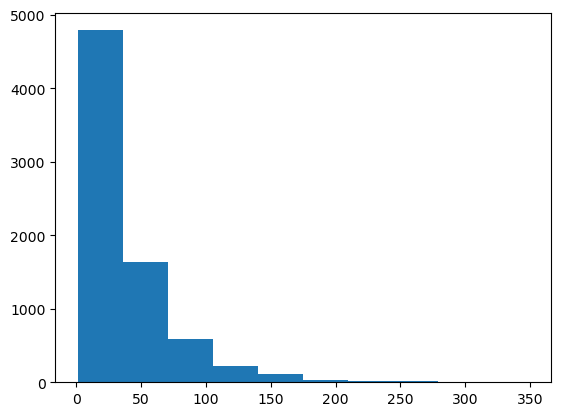

In [188]:
plt.hist(np.concatenate([utils.filter_durations(utils.extract_durations(tr["actions"]), 0)[1:-1] for tr in trajectories]))
plt.show()

In [189]:
np.unique(np.concatenate([utils.filter_durations(utils.extract_durations(tr["actions"]), 1)[1:-1] for tr in trajectories]), return_counts = True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 30., 34., 38.]),
 array([1500, 1073,  906,  693,  468,  429,  362,  269,  201,  174,  154,
          95,   61,   56,   38,   31,   27,   26,   15,   14,    9,    4,
           8,    5,    6,    4,    1,    2,    1,    1,    1]))

In [190]:
np.mean(np.concatenate([utils.filter_durations(utils.extract_durations(tr["actions"]), 1)[1:-1] for tr in trajectories]))

4.563460958697618

(array([4.172e+03, 1.528e+03, 6.240e+02, 1.550e+02, 9.900e+01, 3.500e+01,
        1.500e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

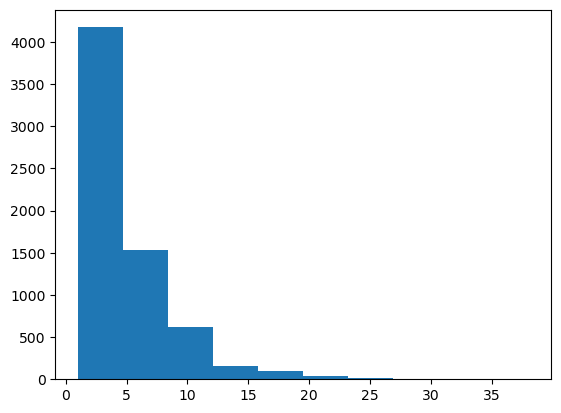

In [191]:
plt.hist(np.concatenate([utils.filter_durations(utils.extract_durations(tr["actions"]), 1)[1:-1] for tr in trajectories]))

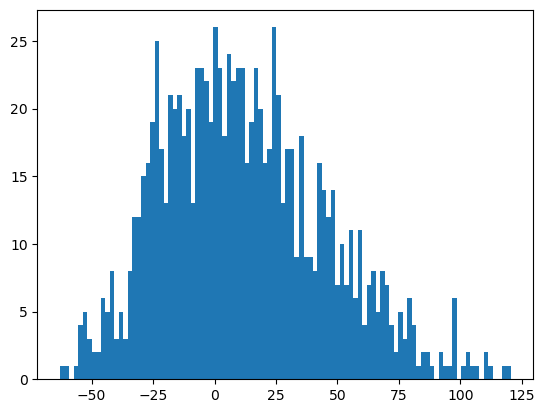

In [192]:
plt.hist([tr["features"][1][-1] - tr["features"][1][0] for tr in trajectories], bins = 100)
plt.show()

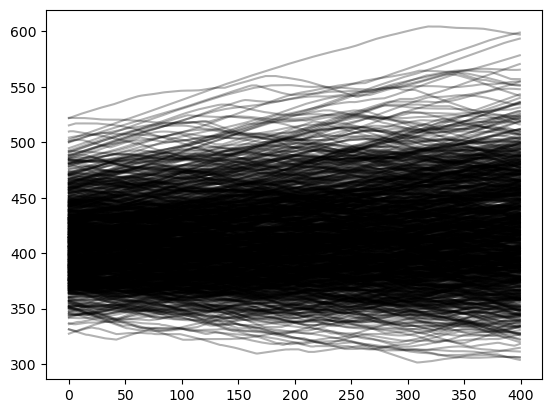

In [193]:
for tr in trajectories:
    plt.plot(tr["features"][1], c = 'k', alpha = 0.3)

In [197]:
F = 2
M = 2
A = 2

seed = 0

FSC_tofit = controller.FSC("continuous", M = M, A = A, F = F, seed = seed)

In [198]:
NEpochs = 10
NBatch = 10
lr = (0.05, 0.05)
gamma = 0.99
train_split = 0.8

In [199]:
tloss, vloss = FSC_tofit.fit(trajectories, NEpochs = NEpochs,
                             NBatch = NBatch, lr = lr, gamma = gamma, train_split = train_split)

Training with 80 trajectories and validating with 20 trajectories. Using a single learning rate of 0.05.
Epoch 1 - Training loss: 225.80028686523434, Validation loss: 135.54172477722167 - Learning rate: 0.05
Epoch 2 - Training loss: 114.75412979125976, Validation loss: 83.98303089141845 - Learning rate: 0.0495
Epoch 3 - Training loss: 91.38831024169922, Validation loss: 76.7837532043457 - Learning rate: 0.049005
Epoch 4 - Training loss: 86.87002563476562, Validation loss: 71.838547706604 - Learning rate: 0.04851495
Epoch 5 - Training loss: 78.55912246704102, Validation loss: 60.73135242462158 - Learning rate: 0.0480298005
Epoch 6 - Training loss: 63.957509613037104, Validation loss: 48.38766050338745 - Learning rate: 0.047549502495
Epoch 7 - Training loss: 53.41776657104492, Validation loss: 43.970196628570555 - Learning rate: 0.04707400747005
Epoch 8 - Training loss: 51.17436752319337, Validation loss: 43.952565383911136 - Learning rate: 0.0466032673953495
Epoch 9 - Training loss: 51.

In [200]:
FSC_tofit.set_mode("generation")

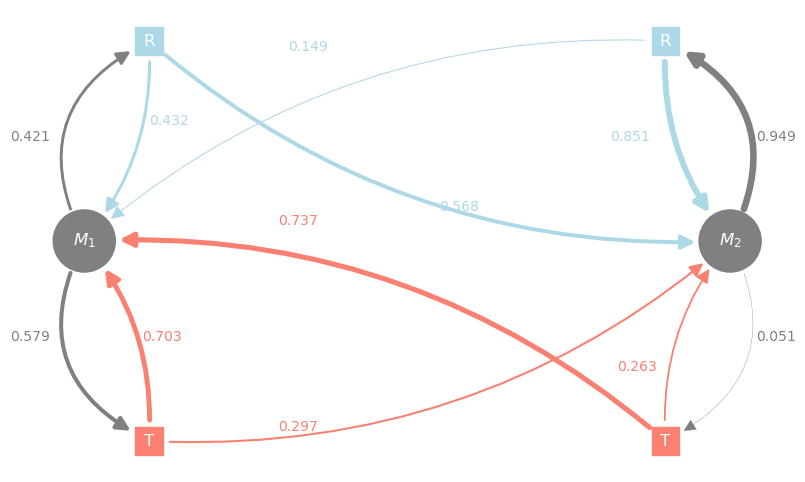

In [215]:
ftest = np.array([1, 0.001])

FSC_tofit.plot_FSC(features = ftest, figsize = (10, 6))

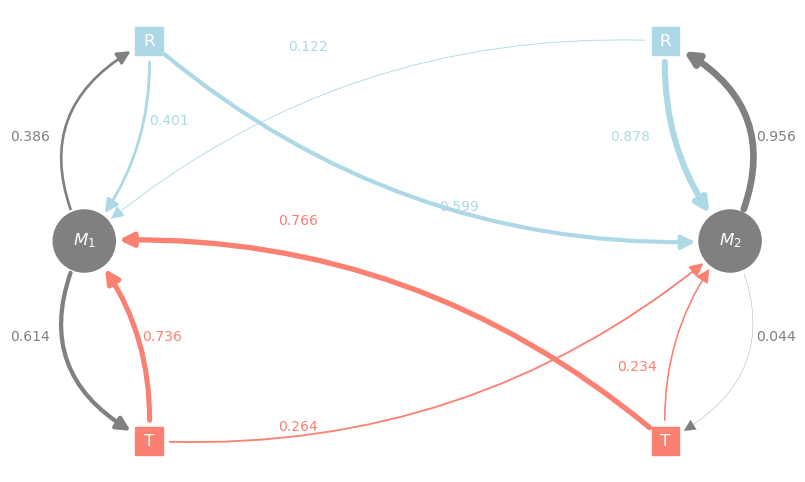

In [217]:
ftest = np.array([1, 0.1])

FSC_tofit.plot_FSC(features = ftest, figsize = (10, 6))

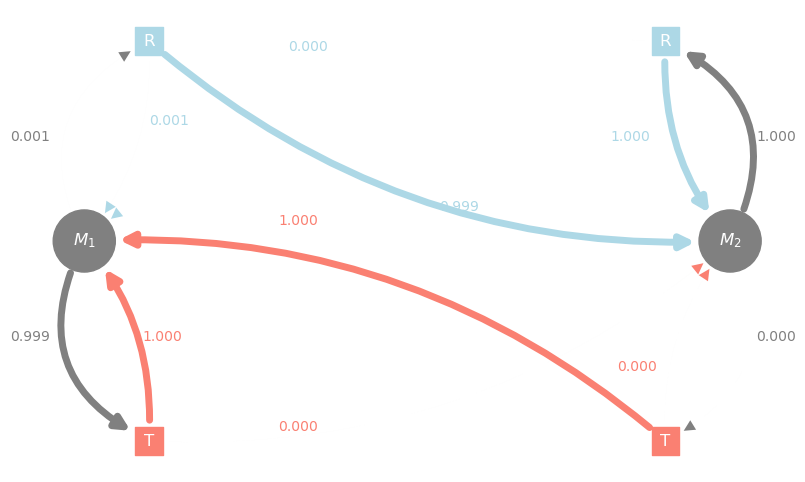

In [216]:
ftest = np.array([1, 5])

FSC_tofit.plot_FSC(features = ftest, figsize = (10, 6))

In [204]:
gt = FSC_tofit.generate_trajectories()

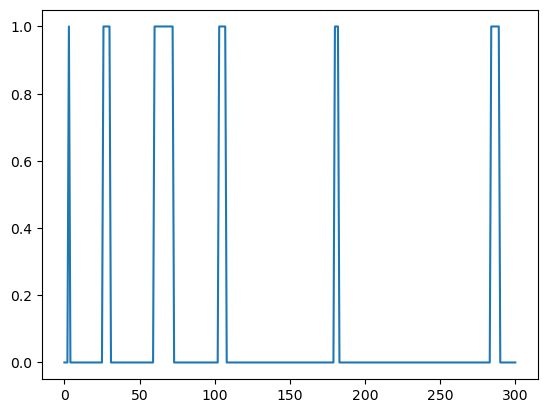

In [205]:
plt.plot(gt[0]["actions"])

In [213]:
np.unique(np.concatenate([utils.filter_durations(utils.extract_durations(tr["actions"]), 1)[1:-1] for tr in gt]), return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 22, 23, 24]),
 array([113,  89,  75,  49,  40,  38,  29,  23,  14,  14,  11,   9,   4,
          3,   9,   4,   3,   2,   3,   2,   1,   2,   3]))

In [ ]:
### previous test

In [180]:
FSC_tofit.set_mode("generation")

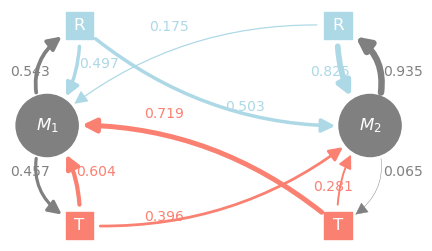

In [191]:
ftest = np.array([1, 0.001])

FSC_tofit.plot_FSC(features = ftest)

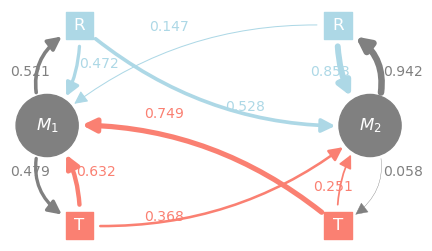

In [181]:
ftest = np.array([1, 0.1])

FSC_tofit.plot_FSC(features = ftest)

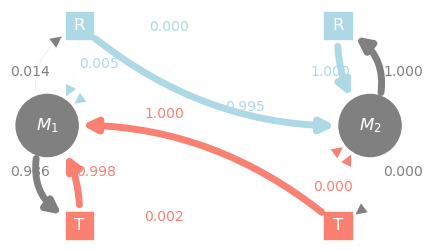

In [192]:
ftest = np.array([1, 5])

FSC_tofit.plot_FSC(features = ftest)

In [185]:
gt = FSC_tofit.generate_trajectories()

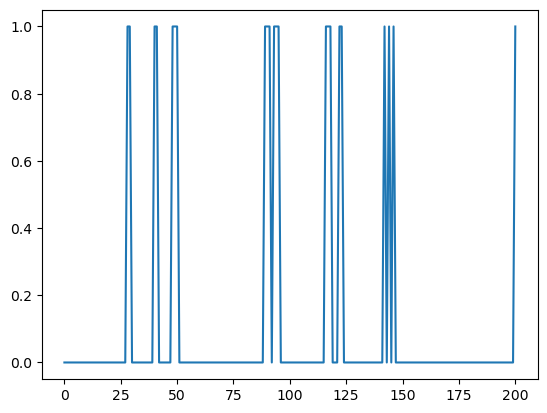

In [188]:
plt.plot(gt[0]["actions"])

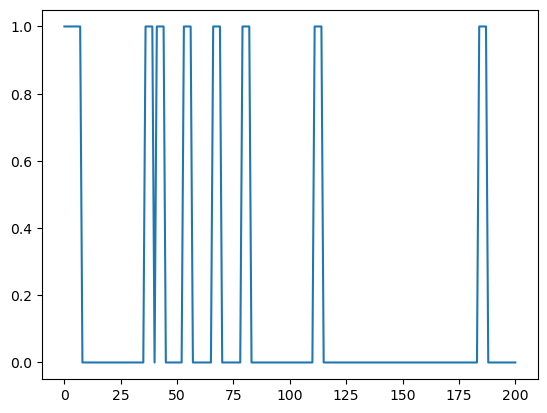

In [190]:
plt.plot(res[0]["actions"][::tau_sub])

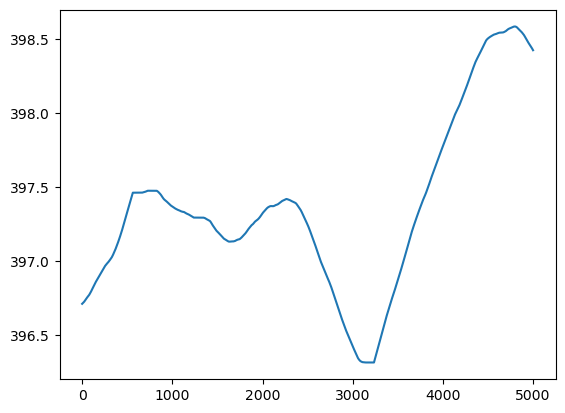

In [ ]:
trajectories = [{"features": torch.tensor(res["features"]), "targets": torch.tensor(res["targets"])}]

In [144]:
res[0]["actions"].shape

(5001,)

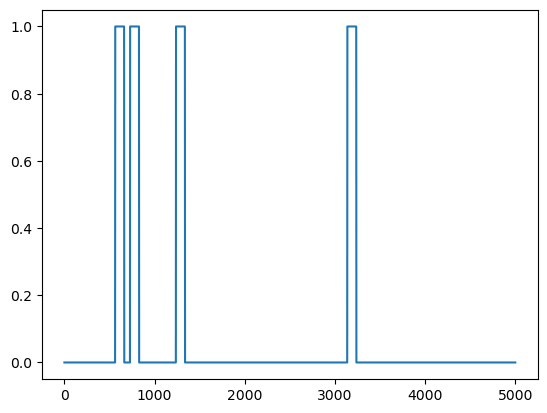

In [145]:
plt.plot(res[1]["actions"])

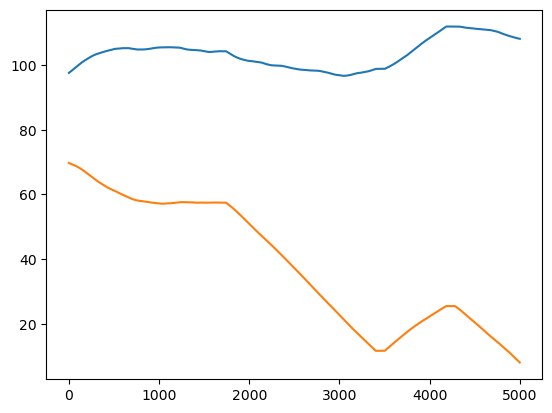

In [146]:
plt.plot(res[0]["pos_xyz"][0])
plt.plot(res[0]["pos_xyz"][1])